# Values comparison
## Moral Foundations BERT

ME2-BERT: https://huggingface.co/lorenzozan/ME2-BERT
Research. Why?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

In [2]:
from transformers import AutoTokenizer, AutoModel
import torch

model_name = "lorenzozan/ME2-BERT"
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModel.from_pretrained(model_name, trust_remote_code=True)

In [3]:
# Load texts
df_texts = pd.read_csv("values_texts_2.csv")
df_texts

,user_id,value_text
0,1,What matters most to me is that everyone respe...
1,2,I care most about fairness in how we share cho...
2,3,Honest and compassionate communication matters...
3,4,"For me, the most important thing is living sus..."
4,5,What I value most is that people look out for ...
5,6,It’s essential to me that the community is inc...
6,7,Eating together regularly is what matters most...
7,8,The most important thing for me is that the pl...
8,9,I love when people bring creative energy — org...
9,10,Trust is what makes communal living work. I va...


{'CH':'CARE/HARM','FC':'FAIRNESS/CHEATING', 'LB':'LOYALTY/BETRAYAL', 'AS':'AUTHORITY/SUBVERSION', 'PD': 'PURITY/DEGRADATION'}

In [4]:
# Prepare inputs and run model
texts = df_texts['value_text'].tolist()
inputs = tokenizer(texts, padding="max_length", truncation=True, return_tensors="pt")
model.eval()  # optional but best practice
with torch.no_grad():
    outputs = model(**inputs, return_dict=True)

# Resulting embeddings
print(outputs)

[{'CH': 0.0759, 'FC': 0.04003, 'LB': 0.79103, 'AS': 0.00356, 'PD': 0.00589}, {'CH': 0.9802, 'FC': 0.98835, 'LB': 0.709, 'AS': 0.1424, 'PD': 0.0589}, {'CH': 0.88112, 'FC': 0.5235, 'LB': 0.85534, 'AS': 0.02351, 'PD': 0.23187}, {'CH': 0.30775, 'FC': 0.00476, 'LB': 0.6519, 'AS': 0.00102, 'PD': 0.01102}, {'CH': 0.96415, 'FC': 0.31137, 'LB': 0.94545, 'AS': 0.06191, 'PD': 0.76738}, {'CH': 0.74928, 'FC': 0.05732, 'LB': 0.85573, 'AS': 0.00206, 'PD': 0.03242}, {'CH': 0.54727, 'FC': 0.01416, 'LB': 0.87365, 'AS': 0.00221, 'PD': 0.01382}, {'CH': 0.43919, 'FC': 0.25907, 'LB': 0.77737, 'AS': 0.80597, 'PD': 0.00802}, {'CH': 0.00768, 'FC': 0.00281, 'LB': 0.74015, 'AS': 0.00069, 'PD': 0.012}, {'CH': 0.03679, 'FC': 0.48957, 'LB': 0.87694, 'AS': 0.00918, 'PD': 0.00964}, {'CH': 0.66255, 'FC': 0.0125, 'LB': 0.7383, 'AS': 0.00117, 'PD': 0.02165}, {'CH': 0.9173, 'FC': 0.05634, 'LB': 0.90451, 'AS': 0.00262, 'PD': 0.10897}, {'CH': 0.98234, 'FC': 0.98369, 'LB': 0.92584, 'AS': 0.04277, 'PD': 0.55112}, {'CH': 0.00

In [17]:
# Transform outputs to a matrix of shape (num_users, embedding_dim)
# Choose column order explicitly
cols = ['CH', 'FC', 'LB', 'AS', 'PD']
matrix_np = np.array([[d.get(c, 0.0) for c in cols] for d in outputs])
print("numpy shape:", matrix_np.shape)
print(matrix_np)
scores = matrix_np.copy()  # Use this scores matrix for clustering

numpy shape: (15, 5)
[[7.5900e-02 4.0030e-02 7.9103e-01 3.5600e-03 5.8900e-03]
 [9.8020e-01 9.8835e-01 7.0900e-01 1.4240e-01 5.8900e-02]
 [8.8112e-01 5.2350e-01 8.5534e-01 2.3510e-02 2.3187e-01]
 [3.0775e-01 4.7600e-03 6.5190e-01 1.0200e-03 1.1020e-02]
 [9.6415e-01 3.1137e-01 9.4545e-01 6.1910e-02 7.6738e-01]
 [7.4928e-01 5.7320e-02 8.5573e-01 2.0600e-03 3.2420e-02]
 [5.4727e-01 1.4160e-02 8.7365e-01 2.2100e-03 1.3820e-02]
 [4.3919e-01 2.5907e-01 7.7737e-01 8.0597e-01 8.0200e-03]
 [7.6800e-03 2.8100e-03 7.4015e-01 6.9000e-04 1.2000e-02]
 [3.6790e-02 4.8957e-01 8.7694e-01 9.1800e-03 9.6400e-03]
 [6.6255e-01 1.2500e-02 7.3830e-01 1.1700e-03 2.1650e-02]
 [9.1730e-01 5.6340e-02 9.0451e-01 2.6200e-03 1.0897e-01]
 [9.8234e-01 9.8369e-01 9.2584e-01 4.2770e-02 5.5112e-01]
 [6.2300e-03 4.1100e-03 1.7000e-04 9.7000e-04 2.4000e-04]
 [2.9690e-02 3.3000e-03 6.5133e-01 1.6200e-03 3.1100e-02]]


In [18]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
cosine_sim = cosine_similarity(scores)

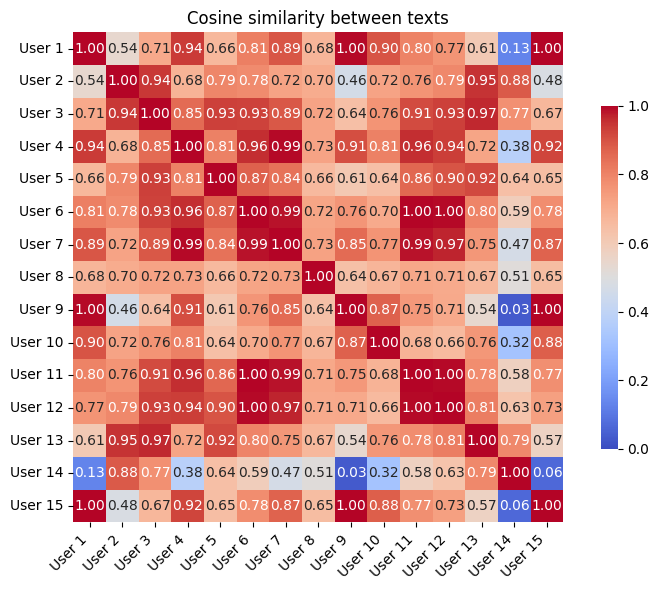

In [19]:
# Friendly row/col labels
n = cosine_sim.shape[0]
labels = [f'User {i+1}' for i in range(n)]

# Simple heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cosine_sim, xticklabels=labels, yticklabels=labels, annot=True, fmt=".2f",
            cmap="coolwarm", vmin=0, vmax=1, square=True, cbar_kws={"shrink":0.7})
plt.title("Cosine similarity between texts")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
# Clustering based on score vectors
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

users=range(len(texts))  # Dummy user IDs

def cluster_tfidf(scores, n_clusters=3, method='kmeans', eps=0.35, min_samples=2):
    """
    Cluster users based on TF-IDF of their 'answer' field.
    method: 'kmeans' | 'agglomerative' | 'dbscan'
    Returns: labels, model, vectorizer, tfidf_matrix
    """
    X = scores
    Xn = normalize(X)                         # normalize so cosine ~ dot product

    if method == 'kmeans':
        model = KMeans(n_clusters=n_clusters, random_state=42).fit(Xn)
        labels = model.labels_
    elif method == 'agglomerative':
        D = pairwise_distances(Xn, metric='cosine')
        model = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='average').fit(D)
        labels = model.labels_
    elif method == 'dbscan':
        model = DBSCAN(metric='cosine', eps=eps, min_samples=min_samples).fit(Xn)
        labels = model.labels_
    else:
        raise ValueError("Unknown method")

    sil = None
    if len(set(labels)) > 1 and -1 not in set(labels):  # silhouette needs >=2 clusters (ignore noise)
        try:
            sil = silhouette_score(Xn, labels, metric='cosine')
        except Exception:
            sil = None

    # Print assignments
    #for u, lab in zip(users, labels):
        #print(f"User {u.id} -> cluster {lab}")

    print("Silhouette (cosine):", sil)

    return labels, model, X


# Test clustering
labels, model, Xmat = cluster_tfidf(scores, n_clusters=3, method='kmeans')

Silhouette (cosine): 0.5201503966349538


/Users/alejandranavarrocastillo/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/alejandranavarrocastillo/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette (cosine): 0.5201503966349538


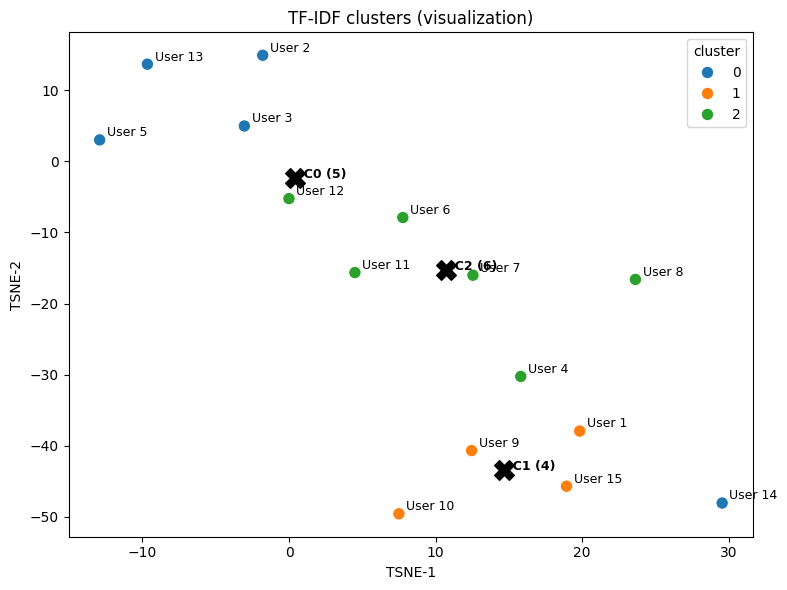

In [21]:
# New: improved cluster visualization helper

def visualize_clusters(scores, labels, X, title='Cluster visualization'):
    """
    Produce a 2D t-SNE scatter of TF-IDF vectors colored by cluster.
    Annotates user ids and plots cluster centroids (2D mean of cluster points).
    """
    # Ensure dense array
    X_dense = X.toarray() if hasattr(X, 'toarray') else np.array(X)

    # 2D projection
    X2 = TSNE(n_components=2, random_state=42, perplexity=5, init='pca', learning_rate='auto').fit_transform(X_dense)

    labels_arr = np.array(labels)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=labels_arr, palette='tab10', legend='full', s=80)

    # Annotate points with their indices or any labels you have
    for i in range(len(X)):
        plt.text(X2[i,0] + 0.5, X2[i,1] + 0.5, f'User {i+1}', fontsize=9)


    # compute and plot 2D centroids for each cluster (ignore noise label -1)
    unique = [l for l in np.unique(labels_arr) if l != -1]
    for l in unique:
        pts = X2[labels_arr == l]
        if len(pts) == 0:
            continue
        cen = pts.mean(axis=0)
        plt.scatter(cen[0], cen[1], marker='X', s=200, color='k', edgecolor='k', linewidth=1)
        plt.text(cen[0], cen[1], f'  C{l} ({len(pts)})', fontsize=9, fontweight='bold')

    plt.title(title)
    plt.xlabel('TSNE-1')
    plt.ylabel('TSNE-2')
    plt.legend(title='cluster')
    plt.tight_layout()
    plt.show()

# Demo: run clustering then visualize (adjust n_clusters/method as needed)
labels, model, Xmat = cluster_tfidf(scores, n_clusters=3, method='kmeans')
visualize_clusters(users, labels, Xmat, title='TF-IDF clusters (visualization)')